In [153]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [154]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05656
Name: Shreya Sriram
Email: 2025aa05656@wilp.bits-pilani.ac.in
Date: 07-Feb-2026

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05656\nName: Shreya Sriram\nEmail: 2025aa05656@wilp.bits-pilani.ac.in\nDate: 07-Feb-2026\n\n================================================================================\n'

In [155]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for 
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT: 
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for \ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT: \n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [156]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

"\n================================================================================\n⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️\n================================================================================\n\n1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb\n   Example: 2025AA05036_rnn_assignment.ipynb\n   ❌ Wrong filename = Automatic 0 marks\n\n2. STUDENT INFORMATION MUST MATCH:\n   ✓ BITS ID in filename = BITS ID in notebook (above)\n   ✓ Name in folder = Name in notebook (above)\n   ❌ Mismatch = 0 marks\n\n3. EXECUTE ALL CELLS BEFORE SUBMISSION:\n   - Run: Kernel → Restart & Run All\n   - Verify all outputs are visible\n   ❌ No outputs = 0 marks\n\n4. FILE INTEGRITY:\n   - Ensure notebook opens without errors\n   - Check for corrupted cells\n   ❌ Corrupted file = 0 marks\n\n5. IMPLEMENTATION REQUIREMENTS:\n   - MUST add positional encoding to transformer (custom or built-in)\n   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n   - DO 

In [157]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math
import tensorflow as tf
from tensorflow.keras import layers, models

In [158]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Deep learning frameworks (choose Keras or PyTorch)

In [159]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [160]:
data = pd.read_csv('indexData.csv', sep=',')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [161]:
df_nya = data[data["Index"] == "NYA"].copy()

# Parse dates and sort
df_nya["Date"] = pd.to_datetime(df_nya["Date"])
df_nya = df_nya.sort_values("Date").set_index("Date")

ts = df_nya["Close"]

df_nya.head()

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [162]:
# REQUIRED: Fill in these metadata fields
dataset_name = "NYA Index prices"
dataset_source = "TODO: Enter source"
n_samples = len(ts)  # Total number of time steps
n_features = 1  # Number of features (1 for univariate, >1 for multivariate)
sequence_length = 30  # Lookback window (10-50)
prediction_horizon = 1 # Forecast steps ahead (1-10)
problem_type = "time_series_forecasting"

In [163]:
primary_metric = "RMSE"
metric_justification = """
RMSE is appropriate because this is a regression problem on continuous stock index values,
and it penalizes larger errors more strongly, which is important when forecasting prices.
"""

In [164]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: NYA Index prices
Source: TODO: Enter source
Total Samples: 13948
Number of Features: 1
Sequence Length: 30
Prediction Horizon: 1
Primary Metric: RMSE
Metric Justification: 
RMSE is appropriate because this is a regression problem on continuous stock index values,
and it penalizes larger errors more strongly, which is important when forecasting prices.



1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

1.3 Data Preprocessing

In [165]:
def preprocess_timeseries(data):
    """
    Preprocess time series data
    
    Args:
        data: raw time series data
    
    Returns:
        preprocessed data, scaler
    """
    # TODO: Normalize/standardize data
    # TODO: Handle missing values if any
    
    if isinstance(data, pd.Series):
        ts = data.copy()
    else:
        ts = pd.Series(np.asarray(data).reshape(-1))

    ts = ts.ffill().bfill()
    values = ts.values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(values)

    return scaled_data, scaler

In [166]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction
    
    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead
    
    Returns:
        X: input sequences, y: target values
    """
    # TODO: Implement sliding window approach
    # Input: [t-n, t-n+1, ..., t-1, t]
    # Target: [t+1] or [t+1, ..., t+h]
    data = np.asarray(data)
    if data.ndim == 1:
        data = data.reshape(-1, 1)   # (n_samples, 1)

    n_samples = data.shape[0]
    n_features = data.shape[1]

    X, y = [], []
    
    max_start = n_samples - seq_length - pred_horizon + 1

    for i in range(max_start):
        x_seq = data[i : i + seq_length]                   
        y_seq = data[i + seq_length : i + seq_length + pred_horizon]  
        X.append(x_seq)
        y.append(y_seq)

    X = np.array(X)  
    y = np.array(y)  

    return X, y

TODO: Preprocess data
TODO: Create sequences

In [167]:
scaled_ts, scaler = preprocess_timeseries(ts) 
print(scaled_ts.shape)  

(13948, 1)


In [168]:
seq_length = 30
pred_horizon = 1
X, y = create_sequences(scaled_ts, seq_length, pred_horizon)
print(X.shape, y.shape) 

(13918, 30, 1) (13918, 1, 1)


In [169]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_size = int(X.shape[0] * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test,  y_test  = X[train_size:], y[train_size:]
train_test_ratio = "90/10"
train_samples = X_train.shape[0]  # TODO: Number of training sequences
test_samples = X_test.shape[0]  # TODO: Number of test sequences

In [170]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 12526
Test Samples: 1392
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [171]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [172]:

"""
    Build LSTM or GRU model
    
    Args:
        model_type: string ('LSTM' or 'GRU')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon
    
    Returns:
        model: compiled RNN model
    """
    # TODO: Implement LSTM or GRU architecture
    # TODO: Stack at least 2 layers
    # TODO: Add output layer

def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build stacked LSTM model
    
    Args:
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per LSTM layer
        n_layers: number of stacked LSTM layers (minimum 2)
        output_size: prediction horizon (e.g., 1)
    
    Returns:
        model: compiled LSTM model
    """
    assert n_layers >= 2, "n_layers must be at least 2"

    model = models.Sequential()

    model.add(
        layers.LSTM(
            hidden_units,
            return_sequences=True,
            input_shape=input_shape
        )
    )
    for i in range(n_layers - 2):
        model.add(
            layers.LSTM(
                hidden_units,
                return_sequences=True
            )
        )
    model.add(
        layers.LSTM(
            hidden_units,
            return_sequences=False
        )
    )

    # Output layer for regression over prediction horizon
    model.add(layers.Dense(output_size))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [173]:
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)
rnn_model.summary()

/Users/shreya/miniconda3/envs/tf_cnn/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

2.2 Train RNN Model

In [174]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [175]:
# Track training time
rnn_start_time = time.time()

In [176]:
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - loss: 7.7527e-04 - mae: 0.0090
Epoch 2/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 5.6275e-05 - mae: 0.0044
Epoch 3/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 5.0237e-05 - mae: 0.0042
Epoch 4/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 4.6811e-05 - mae: 0.0041
Epoch 5/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 4.2724e-05 - mae: 0.0039
Epoch 6/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 4.4625e-05 - mae: 0.0041
Epoch 7/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 4.2746e-05 - mae: 0.0041
Epoch 8/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - loss: 3.9952e-05 - mae: 0.0040
Epoch 9/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - loss: 3.6440e-05 - mae: 0.0038
Epoch 10/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 3.0748e-05 - mae: 0.0034
Epoch 11/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 2.6262e-05 - mae: 0.0032
Epoch 12/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 

TODO: Train your model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [177]:
rnn_training_time = time.time() - rnn_start_time

In [178]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = history.history['loss'][0]  # TODO: Get from training history (first epoch)
rnn_final_loss = history.history['loss'][-1]  # TODO: Get from training history (last epoch)

In [179]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 964.04 seconds
Initial Loss: 0.0008
Final Loss: 0.0000


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [180]:
y_pred_scaled = rnn_model.predict(X_test)      
y_test_scaled = y_test.reshape(-1, 1)  

lstm_y_pred = scaler.inverse_transform(y_pred_scaled)
lstm_y_true = scaler.inverse_transform(y_test_scaled)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [181]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    # TODO: Implement MAPE calculation
    # MAPE = mean(|y_true - y_pred| / |y_true|) * 100
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Avoid division by zero: mask out zero true values
    mask = y_true != 0
    y_true_nonzero = y_true[mask]
    y_pred_nonzero = y_pred[mask]

    return np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / np.abs(y_true_nonzero))) * 100

In [182]:
# REQUIRED: Calculate all 4 metrics
rnn_mae = mean_absolute_error(lstm_y_true, lstm_y_pred)
rnn_rmse = np.sqrt(mean_squared_error(lstm_y_true, lstm_y_pred))
rnn_mape = calculate_mape(lstm_y_true, lstm_y_pred)
rnn_r2 = r2_score(lstm_y_true, lstm_y_pred)

In [183]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   119.2399
RMSE:  162.9106
MAPE:  0.9632%
R² Score: 0.9877


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

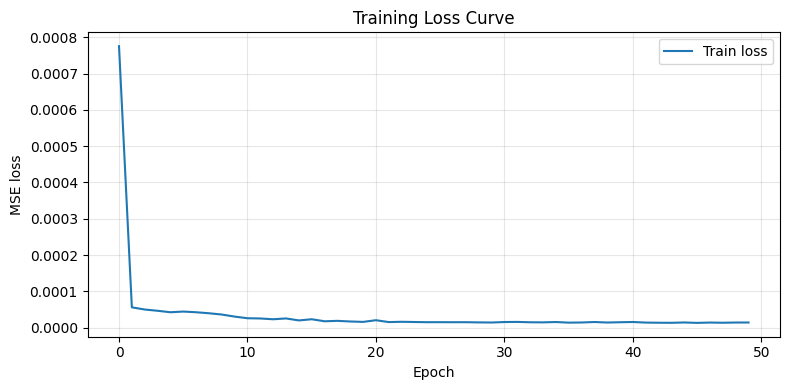

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train loss")
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


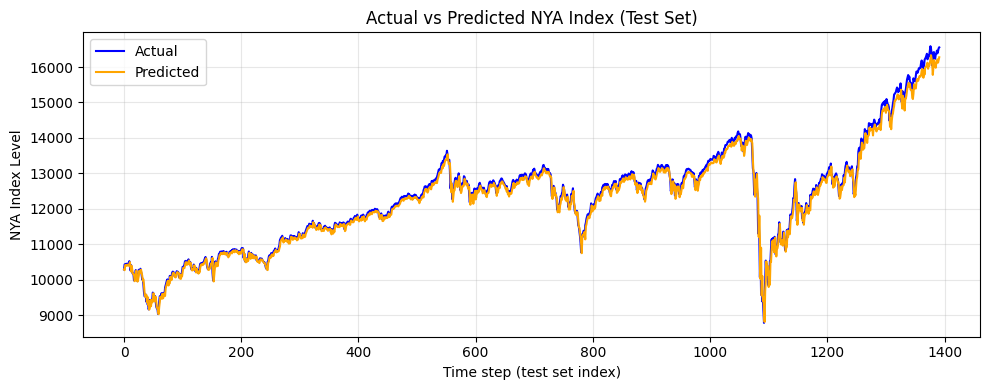

In [185]:
plt.figure(figsize=(10, 4))

plt.plot(lstm_y_true, label="Actual", color="blue")
plt.plot(lstm_y_pred, label="Predicted", color="orange")

plt.xlabel("Time step (test set index)")
plt.ylabel("NYA Index Level")
plt.title("Actual vs Predicted NYA Index (Test Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


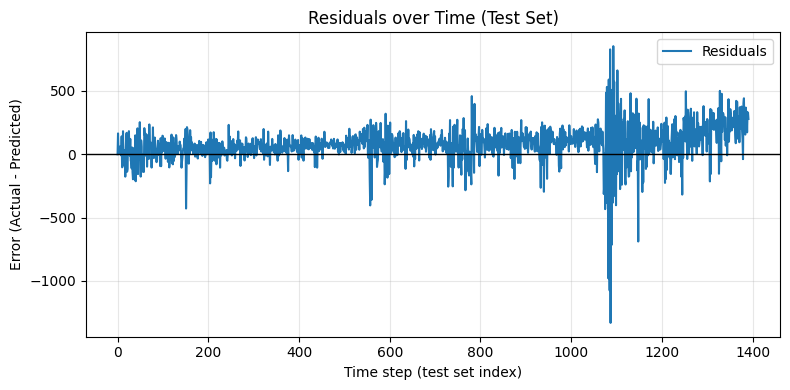

In [186]:
import numpy as np

residuals = (lstm_y_true - lstm_y_pred).ravel()

plt.figure(figsize=(8, 4))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Time step (test set index)")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Residuals over Time (Test Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [187]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [188]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings
    
    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))
    
    Args:
        seq_length: length of the sequence
        d_model: dimension of the model
    
    Returns:
        positional encodings: array of shape (seq_length, d_model)
    """
    # TODO: Implement sinusoidal positional encoding
    # OR use framework's built-in positional encoding if available
    positions = np.arange(seq_length).reshape(-1, 1).astype(np.float32)
    
    dims = np.arange(d_model).reshape(1, -1).astype(np.float32)
    
    angle_rates = 1.0 / np.power(10000.0, (2 * (dims // 2)) / d_model)
    
    angle_rads = positions * angle_rates
    
    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2]) 
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])  

    return pos_encoding

3.2 Transformer Encoder Architecture

In [189]:
# Option A: Using PyTorch
"""
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(d_model, output_size)
    
    def forward(self, x):
        x = self.input_projection(x)
        x = self.pos_encoder(x)  # Add positional encoding
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)
"""

'\nimport torch.nn as nn\n\nclass TransformerModel(nn.Module):\n    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):\n        super().__init__()\n        self.input_projection = nn.Linear(n_features, d_model)\n        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding\n        \n        encoder_layer = nn.TransformerEncoderLayer(\n            d_model=d_model,\n            nhead=n_heads,\n            dim_feedforward=d_ff,\n            batch_first=True\n        )\n        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)\n        self.fc = nn.Linear(d_model, output_size)\n    \n    def forward(self, x):\n        x = self.input_projection(x)\n        x = self.pos_encoder(x)  # Add positional encoding\n        x = self.transformer_encoder(x)\n        x = x.mean(dim=1)  # Global average pooling\n        return self.fc(x)\n'

In [190]:
# Option B: Using Keras

def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))
    
    x = layers.Dense(d_model)(inputs)
    
    x = x + positional_encoding(seq_length, d_model)
    
    for _ in range(n_layers):
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads, 
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization()(x + attn_output)
        
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization()(x + ffn_output)
    
    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)


3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [191]:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [192]:
transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

3.4 Train Transformer Model

In [193]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [194]:
# Track training time
transformer_start_time = time.time()

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [195]:
history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 67s 139ms/step - loss: 0.0770 - mae: 0.0830
Epoch 2/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - loss: 1.1113e-04 - mae: 0.0067
Epoch 3/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 53s 134ms/step - loss: 1.2704e-04 - mae: 0.0076
Epoch 4/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - loss: 1.2832e-04 - mae: 0.0078
Epoch 5/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - loss: 1.6816e-04 - mae: 0.0097
Epoch 6/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - loss: 1.4149e-04 - mae: 0.0084
Epoch 7/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - loss: 2.1891e-04 - mae: 0.0113
Epoch 8/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - loss: 2.2637e-04 - mae: 0.0115
Epoch 9/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - loss: 2.2767e-04 - mae: 0.0117
Epoch 10/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 65s 165ms/step - loss: 2.3524e-04 - mae: 0.0119
Epoch 11/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - loss: 2.9875e-04 - mae: 0.0139
Epoch 12/50
392/392 ━━━━━━━━━━━━━━

In [196]:
transformer_training_time = time.time() - transformer_start_time

In [197]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = history.history['loss'][0]  # TODO: Get from training history (first epoch)
transformer_final_loss = history.history['loss'][-1]  # TODO: Get from training history (last epoch)

In [198]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 2442.63 seconds
Initial Loss: 0.0770
Final Loss: 0.0001


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [199]:

y_pred_scaled = transformer_model.predict(X_test)      
y_test_scaled = y_test                     


y_pred_scaled = y_pred_scaled.reshape(-1, 1)   
y_test_scaled = y_test_scaled.reshape(-1, 1)   


y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test_scaled)


transformer_y_pred_flat = y_pred.ravel()
transformer_y_true_flat = y_true.ravel()


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [200]:
# REQUIRED: Calculate all 4 metrics
transformer_mae = mean_absolute_error(transformer_y_true_flat, transformer_y_pred_flat)
transformer_rmse = math.sqrt(mean_squared_error(transformer_y_true_flat, transformer_y_pred_flat))
transformer_mape = calculate_mape(transformer_y_true_flat, transformer_y_pred_flat)
transformer_r2 = r2_score(transformer_y_true_flat, transformer_y_pred_flat)

In [201]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   139.5398
RMSE:  225.0201
MAPE:  1.1329%
R² Score: 0.9765


3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

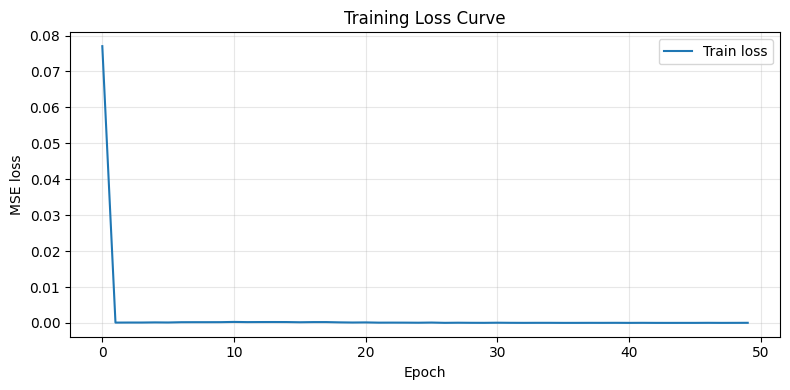

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train loss")
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


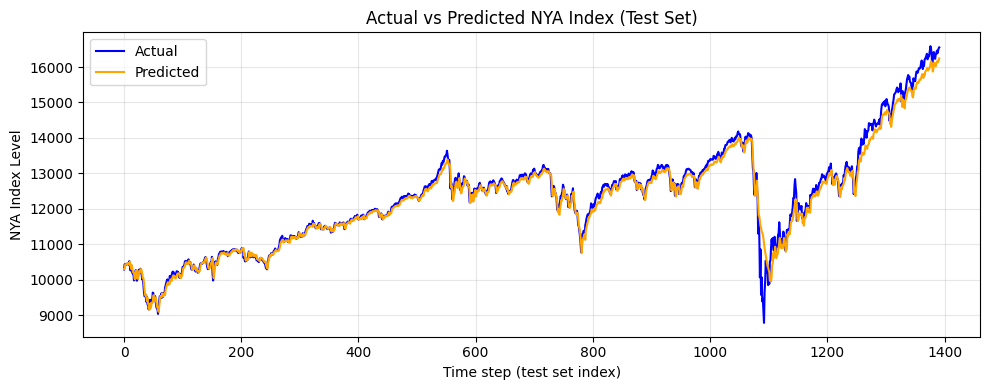

In [203]:
plt.figure(figsize=(10, 4))

plt.plot(transformer_y_true_flat, label="Actual", color="blue")
plt.plot(transformer_y_pred_flat, label="Predicted", color="orange")

plt.xlabel("Time step (test set index)")
plt.ylabel("NYA Index Level")
plt.title("Actual vs Predicted NYA Index (Test Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


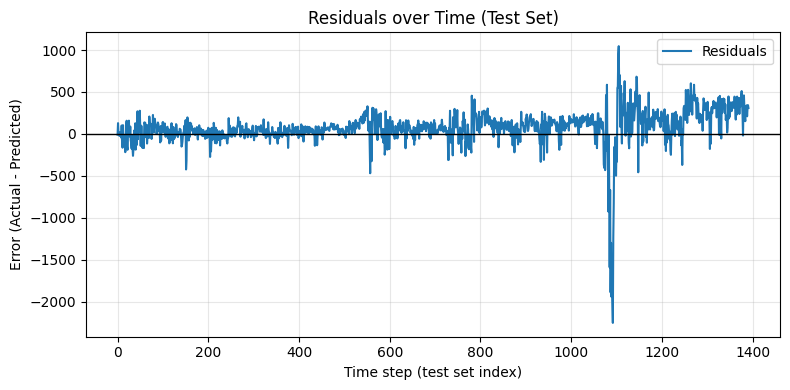

In [204]:
import numpy as np

residuals = (transformer_y_true_flat - transformer_y_pred_flat).ravel()

plt.figure(figsize=(8, 4))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Time step (test set index)")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Residuals over Time (Test Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [205]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [206]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [207]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        rnn_model.count_params()
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        transformer_model.count_params()
    ]
})

In [208]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)   Transformer
              MAE      119.239873    139.539822
             RMSE      162.910594    225.020111
         MAPE (%)        0.963246      1.132900
         R² Score        0.987686      0.976507
Training Time (s)      964.038149   2442.627752
       Parameters    49985.000000 100161.000000


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

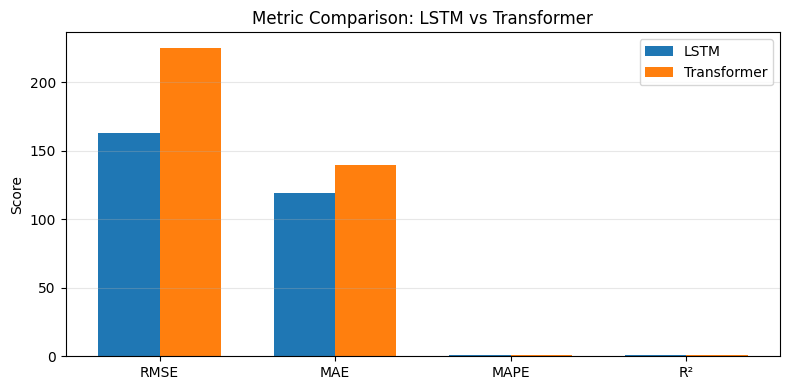

In [209]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["RMSE", "MAE", "MAPE", "R²"]

lstm_vals = [rnn_rmse, rnn_mae, rnn_mape, rnn_r2]
tr_vals   = [transformer_rmse,   transformer_mae,   transformer_mape,   transformer_r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, lstm_vals, width, label="LSTM")
plt.bar(x + width/2, tr_vals,   width, label="Transformer")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Metric Comparison: LSTM vs Transformer")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


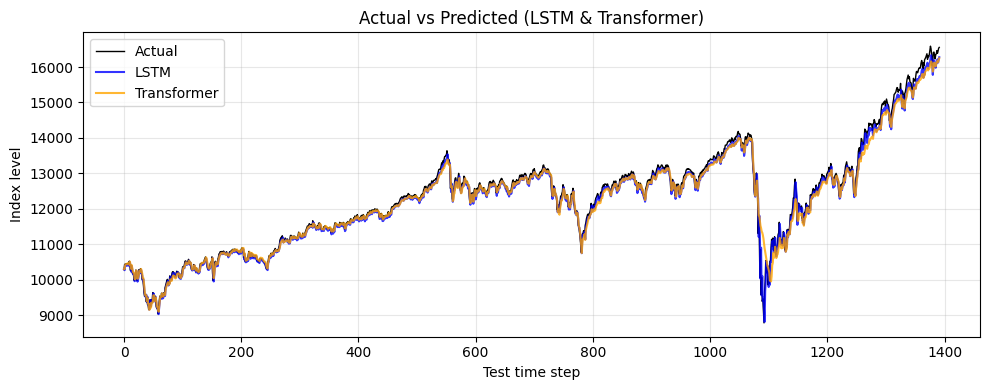

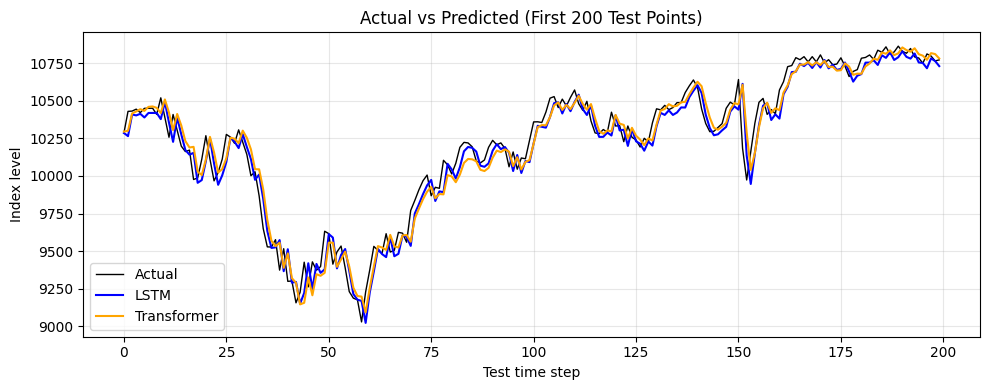

In [210]:
plt.figure(figsize=(10, 4))

plt.plot(lstm_y_true,        label="Actual",       color="black", linewidth=1)
plt.plot(lstm_y_pred,   label="LSTM",         color="blue",  alpha=0.8)
plt.plot(transformer_y_pred_flat,     label="Transformer",  color="orange",alpha=0.8)

plt.xlabel("Test time step")
plt.ylabel("Index level")
plt.title("Actual vs Predicted (LSTM & Transformer)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Optional zoom
plt.figure(figsize=(10, 4))
plt.plot(lstm_y_true[:200],      label="Actual",      color="black", linewidth=1)
plt.plot(lstm_y_pred[:200], label="LSTM",        color="blue")
plt.plot(transformer_y_pred_flat[:200],   label="Transformer", color="orange")
plt.title("Actual vs Predicted (First 200 Test Points)")
plt.xlabel("Test time step")
plt.ylabel("Index level")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [211]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [212]:
analysis_text = """
TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. RNN vs Transformer architecture advantages?
   [Discuss sequential processing vs parallel processing]

3. Impact of attention mechanism?
   [Discuss how attention captures dependencies]

4. Long-term dependency handling?
   [Compare vanishing gradients vs attention]

5. Computational cost comparison?
   [Compare training time, parameters]

6. Convergence behavior?
   [Discuss training stability, loss curves]
"""

In [213]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. RNN vs Transformer architecture advantages?
   [Discuss sequential processing vs parallel processing]

3. Impact of attention mechanism?
   [Discuss how attention captures dependencies]

4. Long-term dependency handling?
   [Compare vanishing gradients vs attention]

5. Computational cost comparison?
   [Compare training time, parameters]

6. Convergence behavior?
   [Discuss training stability, loss curves]

Analysis word count: 69 words
✓ Analysis within word count guideline


In [214]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [215]:
def get_assignment_results():
    """
    Generate complete assignment results in required format
    
    Returns:
        dict: Complete results with all required fields
    """
    
    framework_used = "keras"  # TODO: Change to "pytorch" if using PyTorch
    rnn_model_type = "LSTM"  # TODO: Change to "GRU" if using GRU
    
    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 2,  # TODO: Number of stacked layers
                'hidden_units': 64,  # TODO: Hidden units per layer
                'total_parameters': rnn_model.count_params()  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },
        
        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,  # TODO: Number of transformer layers
                'n_heads': 4,  # TODO: Number of attention heads
                'd_model': 128,  # TODO: Model dimension
                'd_ff': 512,  # TODO: Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': transformer_model.count_params()  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },
        
        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }
    
    return results

In [218]:
# Generate and print results
try:
    assignment_results = get_assignment_results()
    
    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "NYA Index prices",
  "dataset_source": "TODO: Enter source",
  "n_samples": 13948,
  "n_features": 1,
  "sequence_length": 30,
  "prediction_horizon": 1,
  "problem_type": "time_series_forecasting",
  "primary_metric": "RMSE",
  "metric_justification": "\nRMSE is appropriate because this is a regression problem on continuous stock index values,\nand it penalizes larger errors more strongly, which is important when forecasting prices.\n",
  "train_samples": 12526,
  "test_samples": 1392,
  "train_test_ratio": "90/10",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 2,
      "hidden_units": 64,
      "total_parameters": 49985
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 50,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_function": "MSE"
    },
    "initial_loss": 0.0007752702222205698,
    "final_loss": 1.4480057870969176e-05,
  

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)